<a href="https://colab.research.google.com/github/SachinScaler/dsml-apr-23-advanced-batch/blob/main/EDA_Assignment_Intermediate_Part_2_Concepts.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## EDA ASSIGNMENT: Use only standard python functions to solve these. No External libary. Prefer using `File Handling for reading and writing files` while `map, filter, reduce, lambda functions` etc for calculations and wherever possible..

### Easy: 
Q1: Read the california housing test data present in sample_data directory using read mode

In [ ]:
pwd

'/content'

In [ ]:
ls

sample_data/


In [ ]:
ls sample_data

anscombe.json*                mnist_test.csv
california_housing_test.csv   mnist_train_small.csv
california_housing_train.csv  README.md*


In [ ]:
with open("sample_data/california_housing_test.csv", 'r') as file:
  raw_data = file.readlines()

# get the column headers from the sample data
column_headers = map(lambda x : x.strip('\"') , raw_data[0].strip("\n").split(","))

#create a template dictionary
data_dict = {key:[] for key in column_headers}

# loop through each row in the sample data
for row in raw_data[1:]:
  # get the numerical data from each row
  row_data = list(map(float, row.strip().split(",")))

  #add each row data to the dictionary
  for index, key in enumerate(data_dict):
    data_dict[key].append(row_data[index])

Q2: Calculate the Average Median Income and Average Population of full data.

In [ ]:
list(data_dict.keys())

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'median_house_value']

In [ ]:
from functools import reduce

In [ ]:
total_entries = len(raw_data) - 1

In [ ]:
total_median_income = reduce(lambda x,y : x+y, data_dict["median_income"])
average_median_income = total_median_income/total_entries


total_population = reduce(lambda x,y : x+y, data_dict["population"])
average_population = total_population/total_entries

print("average_median_income: ", average_median_income)
print("average_population: ", average_population)

average_median_income:  3.807271799999998
average_population:  1402.7986666666666


Q3: Calculate and return the Min and Max of Housing Age and Housing Value

In [ ]:
def min_max(x, y):
  if type(x) != tuple:
    x = (x, float('-inf'))
  if y < x[0]:
    return (y, x[1])
  elif y > x[1]:
    return (x[0], y)
  else:
    return x

housing_age_min_max = reduce(min_max, data_dict["housing_median_age"])
housing_value_min_max = reduce(min_max, data_dict["median_house_value"])

print("housing_age_min_max: ", housing_age_min_max)
print("housing_value_min_max: ", housing_value_min_max)

housing_age_min_max:  (1.0, 52.0)
housing_value_min_max:  (22500.0, 500001.0)


### Medium: 

Q1: 
For Houses between longitude -119 to -121 and latitude 35 to 37, calculate sum of total Rooms and AVG number of Rooms in this area.

In [ ]:

# filter function to get the entries within the latitude longitude range
def lat_long_filter(x):
  long, lat= x[:2]
  if long <= -119 and long >= -121 and lat >= 35 and lat <= 37:
    return True
  else:
    return False

filtered_entries = filter(lat_long_filter, zip(data_dict["longitude"], data_dict["latitude"],data_dict["total_rooms"]))
# print(list(filtered_entries))

filtered_entries_list = list(filtered_entries)
entires = len(filtered_entries_list)

# sum of total rooms
total_rooms = reduce(lambda x,y : x + y, list(zip(*filtered_entries_list))[2])
print("Total Rooms: ", total_rooms)

# average rooms
average_rooms = total_rooms/entires
print("Average Rooms: ", average_rooms)


Total Rooms:  475536.0
Average Rooms:  2476.75


Q2: 
Calculate AVG Number of Rooms for Houses Priced in top 5 Percentile of Median House Value and compare the number of Rooms against bottom 5 percentiles of Median house Value.

In [ ]:
#calculate the percentile number
five_percentile = int(5 / 100 * total_entries)

# sorting by the median house value
median_house_sorted = sorted(zip(data_dict["total_rooms"], data_dict["median_house_value"]), key = lambda x : x[1])

#finding the top 5 percentile houses based on the median house value
top_5_median_houses = median_house_sorted[total_entries-five_percentile:]

# total rooms in top 5
total_rooms_top = sum(list(zip(*top_5_median_houses))[0])

average_rooms_top = total_rooms_top/five_percentile
print("Averge Rooms in top p5: ", average_rooms_top)

#finding the botom 5 percentile houses based on the median house value
bottom_5_median_houses = median_house_sorted[:five_percentile]

# total rooms in bottom 5
total_rooms_bottom = sum(list(zip(*bottom_5_median_houses))[0])

average_rooms_bottom = total_rooms_bottom/five_percentile
print("Averge Rooms in bottom p5: ", average_rooms_bottom)

Averge Rooms in top p5:  3160.18
Averge Rooms in bottom p5:  1609.9666666666667


### Complex:
#### Q: Statistics: 
Let's say you have a hypothesis that as Income of household Increases the value of house Also increases the people with higher income are more likely to buy costlier Houses.


Can You Calculate Correlation between Median Income and Median House Prices.

Refer the following to correlation formula to calculate correlation coefficient between two columns let's say X and Y.



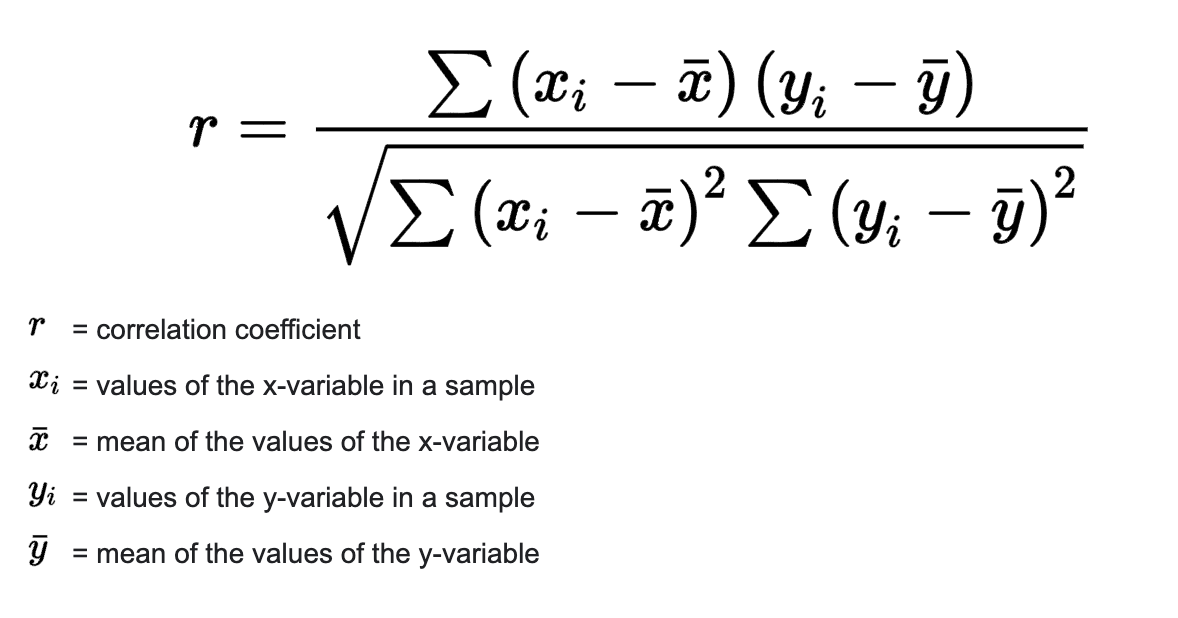

In [ ]:
median_income_mean = sum(data_dict["median_income"])/total_entries
median_house_value_mean = sum(data_dict["median_house_value"])/total_entries

def correlation_numerator(income, house_value):
  return (income - median_income_mean) * (house_value - median_house_value_mean)

def correlation_denominator(value, mean):
  return (value - mean)**2

numerator = sum(map(lambda x : correlation_numerator(x[0], x[1]), zip(data_dict["median_income"], data_dict["median_house_value"])))
d1 = sum(map(lambda x : correlation_denominator(x, median_income_mean), data_dict["median_income"]))
d2 = sum(map(lambda x : correlation_denominator(x, median_house_value_mean), data_dict["median_house_value"]))
denominator = (d1 * d2) ** 0.5

correlation_coefficient = numerator / denominator
print("correlation_coefficient: ", correlation_coefficient)

correlation_coefficient:  0.6726951532511785


Note: Optional Reading sections are not required to be completed in order to solve any of the questions. They are just to make you familiar with the importance of the calculation you are making. So feel free to skips these concepts as they would be covered in future modules.

- Optional Reading: What is Correlation: https://en.wikipedia.org/wiki/Correlation

- Optional Reading: As you might already know correlation is not equal to causation(If not, read about it https://towardsdatascience.com/4-reasons-why-correlation-does-not-imply-causation-f202f69fe979), 

let's verify our hypethesis with actual data points.


#### Part1: Feature Engineering:

- Create A new Column Named Salary Category by assigning values such as 
`[Very Low Salary, Low-Salary, Medium Salary, High Salary, Very High Salary]`.


- The Cateogy should be assigned based 5 equal size buckets based on median income.

for Example Let's say min salary is 0 and max salary is 100 then each category will correspond to bucket size of 20 i,e 

```
mapping = {'0-20': Very Low Salary, '20-40': Low-Salary, '40-50': Medium Salary, '60-80' : High Salary, '80-100': Very High Salary]
```

Optional: Write this new Category back into your file as another column.

#### Part2: Analysis
- Calculate min, max and avg median_house_value for each of the above categlories and analyse the trend if it's increasing or Decreasing as we move higher into Salary Bracket.


- Calculate % change in Avg Median_House_Value across category from previous to next

In [ ]:
import math

# find the min and max for the median income
min_median_income = math.floor(min(data_dict["median_income"]))
max_median_income = math.ceil(max(data_dict["median_income"]))
# print(min_median_income,max_median_income)

# generate the income buckets
income_bucket_size = int((max_median_income - min_median_income)/5)
income_buckets = list(range(min_median_income + income_bucket_size, max_median_income, income_bucket_size))
# print(income_bucket_size, income_buckets)

# establish the income ranges
data_dict["salary_catagory"] = []
buckets = ["Very Low Salary", "Low Salary", "Medium Salary", "High Salary", "Very High Salary"]
bucket_count = len(buckets)

# function to find the income bucket
def bucket_finder(curr_income):
  for id, income in enumerate(income_buckets):
    if curr_income < income:
      return buckets[id]
  return buckets[bucket_count - 1]
  
# update the dict with the income buckets
for income in data_dict["median_income"]:
  data_dict["salary_catagory"].append(bucket_finder(income))

# print(data_dict["salary_catagory"])
# print(list(zip(data_dict["median_income"], data_dict["salary_catagory"])))

# analysing the medium income
analysis_result = {}
def analysis():
  for bucket in buckets:
    a = filter(lambda x : x[1] == bucket, zip(data_dict["median_house_value"], data_dict["salary_catagory"]))
    median_income_filtered = list(zip(*a))[0]
    count = len(median_income_filtered)
    minimum = min(median_income_filtered)
    maximum = max(median_income_filtered)
    average = sum(median_income_filtered) / count
    analysis_result[bucket] = [minimum, maximum, average]
  
analysis()
print("Analysis Result: ")
for key, value in analysis_result.items():
  print(key, value, sep="\n")
# the average salary increases with the increase in income

# percentage change in average house value
def percentage_change(bucket1, bucket2):
  average_perct = (analysis_result[bucket2][2] - analysis_result[bucket1][2]) / analysis_result[bucket1][2] * 100
  print(bucket1, "to", bucket2, ":", round(average_perct,2), "%")
  return bucket2

print("\nAverage Percentage Analysis")
reduce(percentage_change, analysis_result)
print()
# the percentage change in average salary starts decreasing drastically as the median income increases.

Analysis Result: 
Very Low Salary
[22500.0, 500001.0, 135880.24264705883]
Low Salary
[40000.0, 500001.0, 219857.80552070265]
Medium Salary
[106300.0, 500001.0, 353532.7159090909]
High Salary
[225000.0, 500001.0, 476628.225]
Very High Salary
[350000.0, 500001.0, 489286.64285714284]

Average Percentage Analysis
Very Low Salary to Low Salary : 61.8 %
Low Salary to Medium Salary : 60.8 %
Medium Salary to High Salary : 34.82 %
High Salary to Very High Salary : 2.66 %



### You have to store the data into No-SQL databas and send it across web page as JSON Objects where each object stores information of corresponding to one row.

for example:
```
Row1=  [-122.05, 37.37, 27.0, 3885.0, 661.0, 1537.0, 606.0, 6.6085, 344700.0]
```
Expected Output = 
```
{
House1: 
{longitude: -122.05,
latitude: 37.37,
housing_median_age:27.0,
total_rooms: 3885.0,
total_bedrooms: 661.0,
population: 1537.0,
households: 606.0,
median_income: 6.6085,
median_house_value:344700.0
}
}
```

Write function to perform this transformation.

Use this function to transform all the rows and write them into a new file 'Transformed.json'

For Example: 

Input File: input.csv where each col is seperated by comma would look like:  

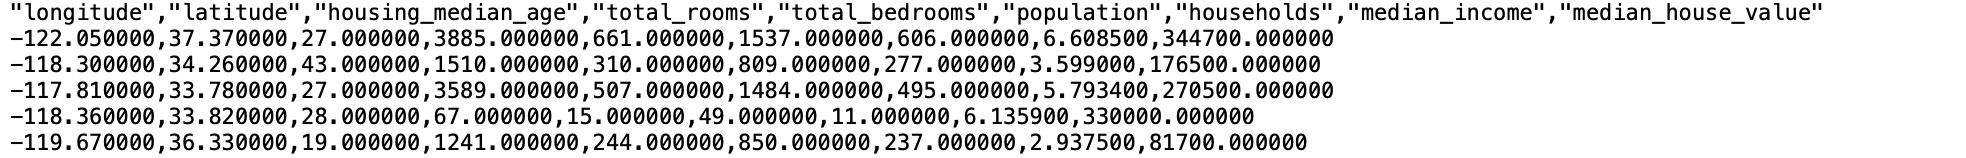

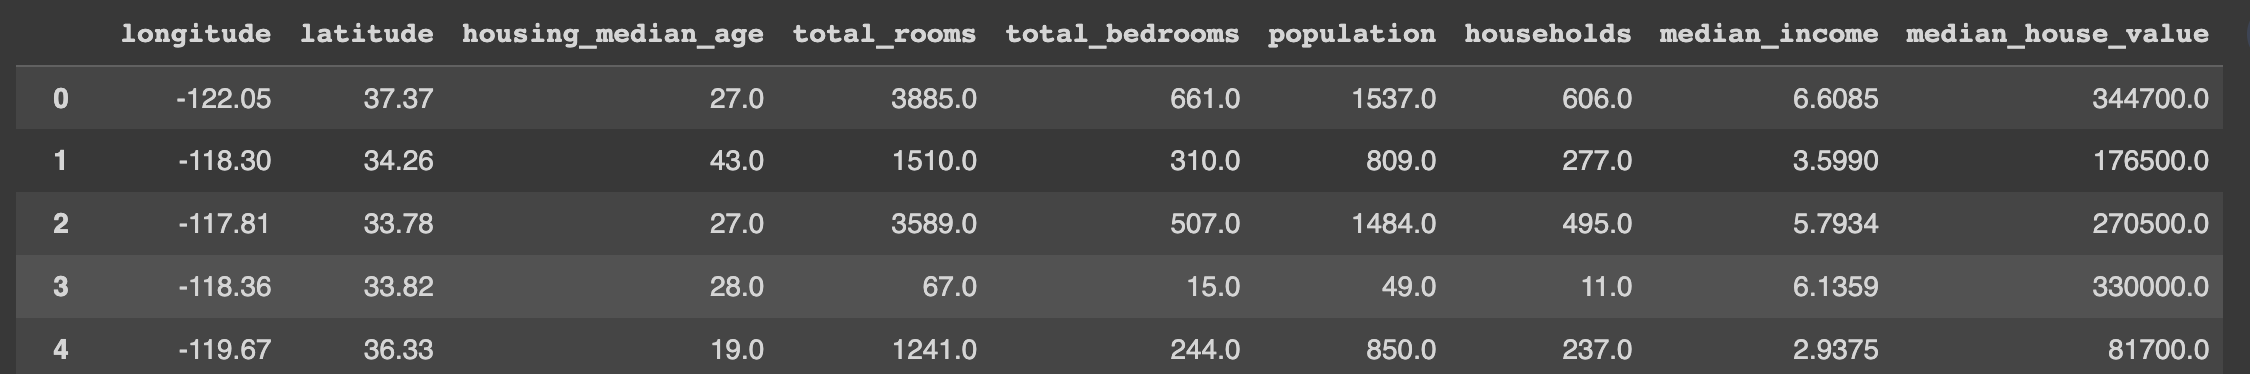

Expected Output: Transformed.json should contain: 
```
0: {'longitude': -122.05,
  'latitude': 37.37,
  'housing_median_age': 27.0,
  'total_rooms': 3885.0,
  'total_bedrooms': 661.0,
  'population': 1537.0,
  'households': 606.0,
  'median_income': 6.6085,
  'median_house_value': 344700.0},
 1: {'longitude': -118.3,
  'latitude': 34.26,
  'housing_median_age': 43.0,
  'total_rooms': 1510.0,
  'total_bedrooms': 310.0,
  'population': 809.0,
  'households': 277.0,
  'median_income': 3.599,
  'median_house_value': 176500.0},
 2: {'longitude': -117.81,
  'latitude': 33.78,
  'housing_median_age': 27.0,
  'total_rooms': 3589.0,
  'total_bedrooms': 507.0,
  'population': 1484.0,
  'households': 495.0,
  'median_income': 5.7934,
  'median_house_value': 270500.0},
 3: {'longitude': -118.36,
  'latitude': 33.82,
  'housing_median_age': 28.0,
  'total_rooms': 67.0,
  'total_bedrooms': 15.0,
  'population': 49.0,
  'households': 11.0,
  'median_income': 6.1359,
  'median_house_value': 330000.0},
 4: {'longitude': -119.67,
  'latitude': 36.33,
  'housing_median_age': 19.0,
  'total_rooms': 1241.0,
  'total_bedrooms': 244.0,
  'population': 850.0,
  'households': 237.0,
  'median_income': 2.9375,
  'median_house_value': 81700.0},
 5: {'longitude': -119.56,
  'latitude': 36.51,
  'housing_median_age': 37.0,
  'total_rooms': 1018.0,
  'total_bedrooms': 213.0,
  'population': 663.0,
  'households': 204.0,
  'median_income': 1.6635,
  'median_house_value': 67000.0},
  ```

In [ ]:
with open("sample_data/california_housing_test.csv", 'r') as file:
  raw_data = file.readlines()

# get the column headers from the sample data
column_headers = list(map(lambda x : x.strip('\"') , raw_data[0].strip().split(",")))
column_count = len(column_headers)
row_count = len(raw_data) - 1

def dict_template(row):
  row_data = list(map(float, row.strip().split(",")))
  temp = {}
  for i, key in enumerate(column_headers):
    temp[key] = row_data[i]
  return temp

json = {id: dict_template(raw_data[id+1]) for id in range(row_count)}
print(json)
with open("sample_data/json_format_test.json", 'w') as file:
  file.write(str(json))

{0: {'longitude': -122.05, 'latitude': 37.37, 'housing_median_age': 27.0, 'total_rooms': 3885.0, 'total_bedrooms': 661.0, 'population': 1537.0, 'households': 606.0, 'median_income': 6.6085, 'median_house_value': 344700.0}, 1: {'longitude': -118.3, 'latitude': 34.26, 'housing_median_age': 43.0, 'total_rooms': 1510.0, 'total_bedrooms': 310.0, 'population': 809.0, 'households': 277.0, 'median_income': 3.599, 'median_house_value': 176500.0}, 2: {'longitude': -117.81, 'latitude': 33.78, 'housing_median_age': 27.0, 'total_rooms': 3589.0, 'total_bedrooms': 507.0, 'population': 1484.0, 'households': 495.0, 'median_income': 5.7934, 'median_house_value': 270500.0}, 3: {'longitude': -118.36, 'latitude': 33.82, 'housing_median_age': 28.0, 'total_rooms': 67.0, 'total_bedrooms': 15.0, 'population': 49.0, 'households': 11.0, 'median_income': 6.1359, 'median_house_value': 330000.0}, 4: {'longitude': -119.67, 'latitude': 36.33, 'housing_median_age': 19.0, 'total_rooms': 1241.0, 'total_bedrooms': 244.0,